In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
# set the notebook parent directory as the working directory
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

/Users/Placebo/OMSCS/CS7641-ML/MachineLearningProjects/Classification


In [17]:
%load_ext autoreload
%autoreload 2
from src.common.utils import set_plot_style
set_plot_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dateset2: YouTube Spam Classifier

In [4]:
data_raw = pd.read_csv('data/dataset2/raw/Youtube-Spam-Dataset.csv')
print('Data shape:', data_raw.shape)
data_raw.head()

Data shape: (1956, 6)


,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


## Target

In [5]:
data_raw['CLASS'].value_counts()

CLASS
1    1005
0     951
Name: count, dtype: int64

# Feature Study

In [5]:
print('the number of authors:', data_raw['AUTHOR'].nunique())
print('the number of video:', data_raw['VIDEO_NAME'].nunique())

the number of authors: 1792
the number of video: 5


In [29]:
author_video_rating = data_raw.groupby(['AUTHOR', 'VIDEO_NAME']).agg({
    'COMMENT_ID': 'count',
    'CLASS': 'mean'
}).sort_values('COMMENT_ID', ascending=False).reset_index()

In [36]:
author_video_rating[author_video_rating['CLASS']< 1].head()

,AUTHOR,VIDEO_NAME,COMMENT_ID,CLASS
2,5000palo,Shakira - Waka Waka,7,0.0
11,Marshmallow Kingdom,"LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",3,0.0
18,Seth Ryan,Eminem - Love The Way You Lie ft. Rihanna,3,0.0
30,Eric Gonzalez,Shakira - Waka Waka,2,0.0
32,The Technology Zoo,Katy Perry - Roar,2,0.0


Text(0.5, 0, 'Average Rating')

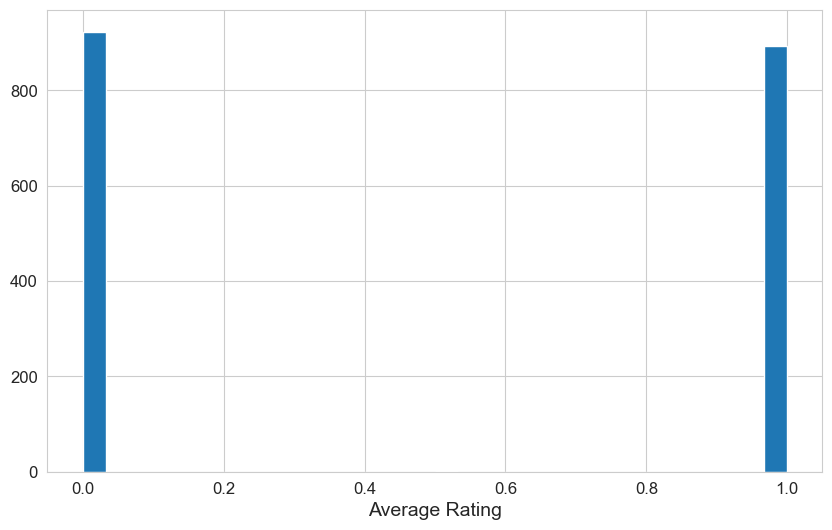

In [32]:
# distribution of rating
plt.hist(author_video_rating['CLASS'], bins=30)
plt.xlabel('Average Rating')
# it means that users either all spam comments or all non-spam comments.

In [49]:
def create_top_authors_heatmap(author_video_rating, n=20):
    # Reset index to have AUTHOR and VIDEO_NAME as columns
    df = author_video_rating.reset_index()
    
    # Get the top n authors by total comment count
    top_authors = df.groupby('AUTHOR')['COMMENT_ID'].sum().nlargest(n).index
    
    # Filter the dataframe to include only top authors
    df_top = df[df['AUTHOR'].isin(top_authors)]
    
    # Create a pivot table for the heatmap
    heatmap_data = df_top.pivot(index='VIDEO_NAME', columns='AUTHOR', values='CLASS')
    
    # Set up the matplotlib figure
    plt.figure(figsize=(15, 8))
    
    # Create the heatmap
    sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt='.2f', 
                cbar_kws={'label': 'Spam Likelihood'})
    
    # Customize the plot
    plt.title(f'Spam Likelihood for Top {n} Authors by Comment Frequency')
    plt.xlabel('Author')
    plt.ylabel('Video Name')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Adjust layout to prevent cutting off labels
    plt.tight_layout()
    # remove the background grid
    plt.grid(False)
    
    # Show the plot
    plt.show()

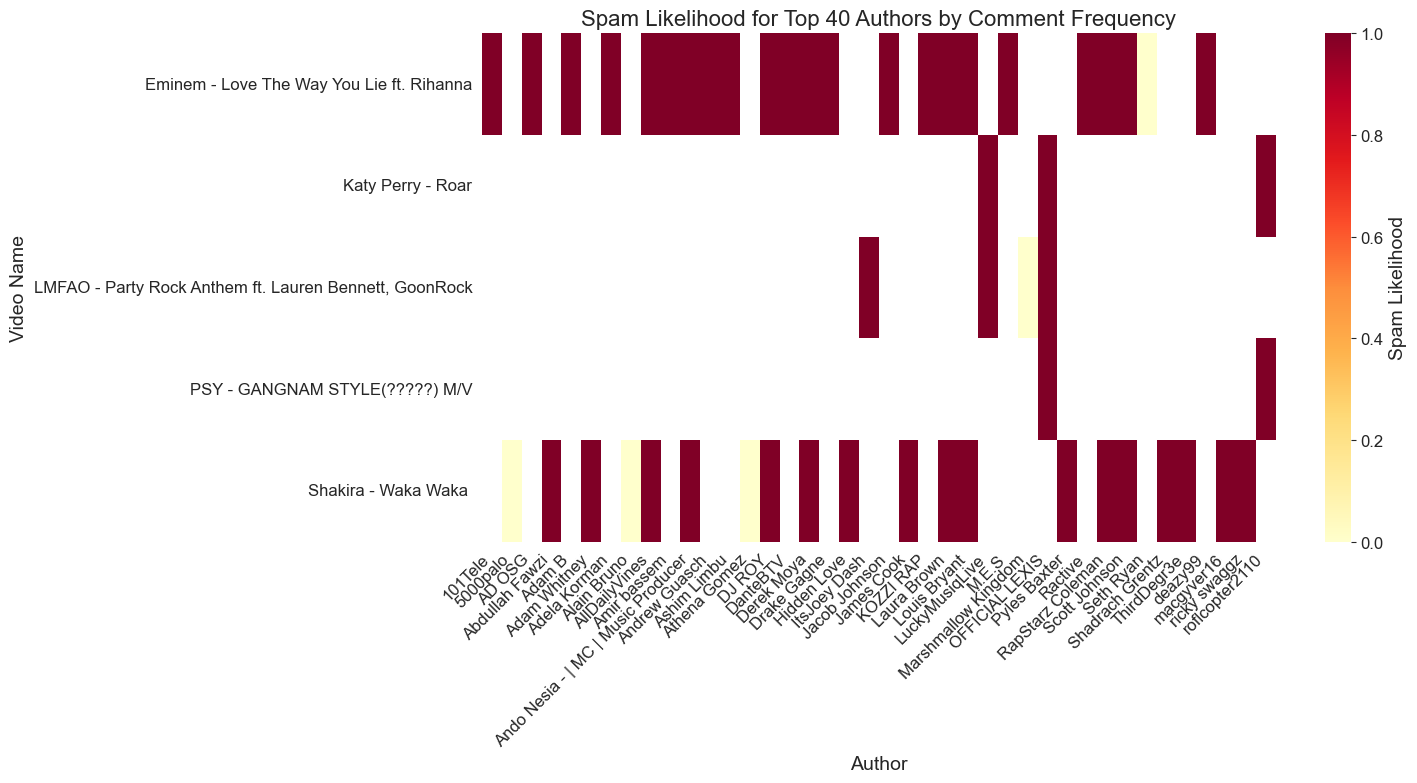

In [48]:
create_top_authors_heatmap(author_video_rating, n=40)

# Author

In [8]:
# what the top author who has spam 

CLASS     
                                   count mean
AUTHOR                                       
Michael J. Cabose                      2  1.0
Ori Yonay (EatDaPoison)                1  1.0
Nguyen Thanh Son                       1  1.0
NeverGreen35                           1  1.0
Nere Overstylish                       1  1.0
...                                  ...  ...
Prim N.                                1  0.0
Deepty Awasthy                         1  0.0
Debora Favacho (Debora Sparkle)        1  0.0
Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿     1  0.0
   Berty  Winata                       1  0.0

[1792 rows x 2 columns]